In [1]:
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Data Training

In [3]:
# Load data
data = pd.read_csv('/content/data-tummyfit-v6.csv')
data

,Recipe ID,Recipe Title,Calories,Fat/g,Carbo/g,Protein/g,Alcohol,Vegetarian,Vegan,Gluten Free,...,Ready in Minutes,Image,Popular,Price Per Serving,Halal,Breakfast,Lunch,Dinner,Snack 1,Snack 2
0,1,Fried Anchovies with Sage,384.0,11.0,33.0,37.0,0.0,0,0,0,...,45,https://spoonacular.com/recipeImages/1-556x370...,0,5.6051,1,1,0,0,0,0
1,2,Anchovies Appetizer With Breadcrumbs & Scallions,57.0,2.0,4.0,5.0,0.0,0,0,0,...,15,https://spoonacular.com/recipeImages/2-556x370...,0,8.2060,1,0,0,0,1,0
2,3,Fried Anchovies,356.0,31.0,10.0,9.0,0.0,0,0,0,...,15,https://spoonacular.com/recipeImages/6-556x370...,0,1.5050,1,0,0,0,1,0
3,4,Marinated Fresh Anchovies: Alici Marinate,221.0,11.0,3.0,24.0,0.0,0,0,1,...,420,https://spoonacular.com/recipeImages/9-556x370...,0,5.5005,0,1,0,0,0,0
4,5,Roasted Peppers with Boquerones,32.0,0.0,5.0,2.0,0.0,0,0,1,...,45,https://spoonacular.com/recipeImages/12-556x37...,0,5.8440,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1302,Mini Quesadillas,220.0,10.0,18.0,14.0,0.0,0,0,0,...,20,https://hostthetoast.com/wp-content/uploads/20...,1,9.9900,0,0,0,0,1,0
1298,1303,Buffalo Chicken Onion Wings,280.0,20.0,2.0,24.0,0.0,0,0,0,...,40,https://heretocook.com/wp-content/uploads/2021...,1,8.0000,0,0,0,0,1,0
1299,1304,Bacon-Wrapped Shrimp,180.0,12.0,5.0,15.0,0.0,0,0,0,...,30,https://therecipecritic.com/wp-content/uploads...,1,8.9900,0,0,0,0,1,0
1300,1305,Crab Cakes,220.0,15.0,10.0,12.0,0.0,0,0,0,...,40,https://www.mygourmetconnection.com/wp-content...,1,10.9900,0,0,0,0,1,0


In [4]:
# normalize calories
scaler = MinMaxScaler()
# set to array 2 dimensi
calories = data['Calories'].values.reshape(-1, 1)
# Normalize
calories_scaled = scaler.fit_transform(calories)

# add normalize data to 'Calories'
data['Calories'] = calories_scaled


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recipe ID          1302 non-null   int64  
 1   Recipe Title       1302 non-null   object 
 2   Calories           1302 non-null   float64
 3   Fat/g              1302 non-null   float64
 4   Carbo/g            1302 non-null   float64
 5   Protein/g          1302 non-null   float64
 6   Alcohol            1302 non-null   float64
 7   Vegetarian         1302 non-null   int64  
 8   Vegan              1302 non-null   int64  
 9   Gluten Free        1302 non-null   int64  
 10  Dairy Free         1302 non-null   int64  
 11  Dish Type          1302 non-null   object 
 12  Ingredients        1302 non-null   object 
 13  Instructions       1300 non-null   object 
 14  Ready in Minutes   1302 non-null   int64  
 15  Image              1302 non-null   object 
 16  Popular            1302 

# Model

In [6]:
# Load food_data as y
food_data = data

# Preprocess input data
def preprocess_input(calorie_requirement, halal, vegetarian, vegan, gluten_free, dairy_free):
    # Normalize calorie_requirement to range [0, 1]
    calorie_requirement /= 3000.0

    input_data = [calorie_requirement, halal, vegetarian, vegan, gluten_free, dairy_free]
    return np.array(input_data)

In [7]:
# Generate training data
# Buat dummy dataset untuk X train (train_input), berisi 5000 data user input
# dan y train (train_output), berisi kombinasi menu harian
train_input = []
train_output = []

for _ in range(5000):
    # Generate random input values
    calorie_requirement = np.random.randint(500, 3001)
    halal = bool(np.random.randint(2))
    vegetarian = bool(np.random.randint(2))
    vegan = bool(np.random.randint(2))
    gluten_free = bool(np.random.randint(2))
    dairy_free = bool(np.random.randint(2))

    # Preprocess input
    input_data = preprocess_input(calorie_requirement, halal, vegetarian, vegan, gluten_free, dairy_free)

    # Generate random menu combination
    menu_combination = []

    # Select one menu for each category
    categories = ['Breakfast', 'Lunch', 'Dinner', 'Snack 1', 'Snack 2']
    total_calories = 0
    for category in categories:
        category_menu = food_data[food_data[category] == 1].reset_index(drop=True)
        menu_index = np.random.choice(len(category_menu))
        menu_combination.append(menu_index)
        total_calories += category_menu.loc[menu_index, 'Calories']

    # Append to training data
    train_input.append(input_data)
    train_output.append(menu_combination + [total_calories])

train_input = np.array(train_input)
train_output = np.array(train_output)

In [8]:
# Generate validation data
# Buat dummy dataset untuk X val (val_input), berisi 1000 data user input
# dan y val (val_output), berisi kombinasi menu harian
val_input = []
val_output = []

for _ in range(1000):
    # Generate random input values
    calorie_requirement = np.random.randint(500, 3001)
    halal = bool(np.random.randint(2))
    vegetarian = bool(np.random.randint(2))
    vegan = bool(np.random.randint(2))
    gluten_free = bool(np.random.randint(2))
    dairy_free = bool(np.random.randint(2))

    # Preprocess input
    input_data = preprocess_input(calorie_requirement, halal, vegetarian, vegan, gluten_free, dairy_free)

    # Generate random menu combination
    menu_combination = []

    # Select one menu for each category
    categories = ['Breakfast', 'Lunch', 'Dinner', 'Snack 1', 'Snack 2']
    total_calories = 0
    for category in categories:
        category_menu = food_data[food_data[category] == 1].reset_index(drop=True)
        menu_index = np.random.choice(len(category_menu))
        menu_combination.append(menu_index)
        total_calories += category_menu.loc[menu_index, 'Calories']

    # Append to validation data
    val_input.append(input_data)
    val_output.append(menu_combination + [total_calories])

val_input = np.array(val_input)
val_output = np.array(val_output)


In [12]:
# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='tanh', input_shape=(6,)),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(6)
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae')

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train model
history = model.fit(train_input, train_output, epochs=300, batch_size=64, validation_data=(val_input, val_output), callbacks=[early_stopping])

# Evaluate model on validation data
val_loss = model.evaluate(val_input, val_output)


Epoch 1/300
79/79 [==============================] - 2s 12ms/step - loss: 88.4777 - val_loss: 74.5867
Epoch 2/300
79/79 [==============================] - 1s 11ms/step - loss: 66.7907 - val_loss: 61.4699
Epoch 3/300
79/79 [==============================] - 1s 10ms/step - loss: 58.3516 - val_loss: 56.6441
Epoch 4/300
79/79 [==============================] - 1s 10ms/step - loss: 55.4558 - val_loss: 55.0644
Epoch 5/300
79/79 [==============================] - 1s 10ms/step - loss: 54.5827 - val_loss: 54.5479
Epoch 6/300
79/79 [==============================] - 1s 11ms/step - loss: 54.3241 - val_loss: 54.3463
Epoch 7/300
79/79 [==============================] - 1s 10ms/step - loss: 54.2716 - val_loss: 54.2922
Epoch 8/300
79/79 [==============================] - 1s 10ms/step - loss: 54.2589 - val_loss: 54.2904
Epoch 9/300
79/79 [==============================] - 1s 11ms/step - loss: 54.2584 - val_loss: 54.2715
Epoch 10/300
79/79 [==============================] - 1s 11ms/step - loss: 54.2560

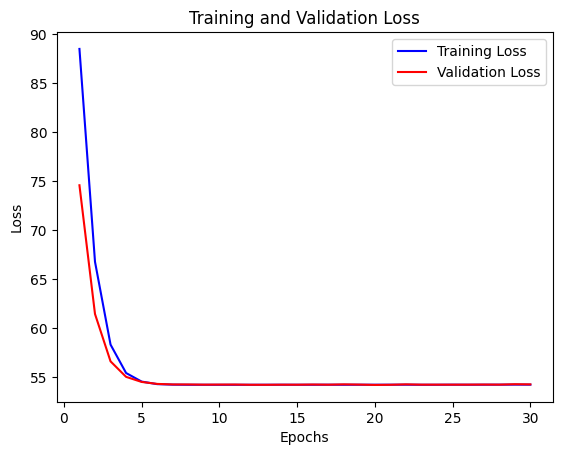

In [13]:
# Get training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss history
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tuning

In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Define model builder function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=256, activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid']), input_shape=(6,)))
    model.add(layers.Dense(units=512, activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dense(units=512, activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dense(units=256, activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dense(units=128, activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dense(units=64, activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])))
    model.add(layers.Dense(units=6))

    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    if optimizer == 'sgd':
        learning_rate = hp.Choice('learning_rate', [0.1, 0.01, 0.001])
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss=hp.Choice('loss', ['mse', 'mae']))

    return model

# Define Keras Tuner random search tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=5,
    directory='tuner_directory',
    project_name='my_tuning_project'
)

# Perform hyperparameter tuning
tuner.search(train_input, train_output, epochs=100, validation_data=(val_input, val_output))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_activation = best_hps.get('activation')
best_optimizer = best_hps.get('optimizer')
best_learning_rate = best_hps.get('learning_rate')
best_loss = best_hps.get('loss')

# Build and compile the model with the best hyperparameters
best_model = build_model(best_hps)
best_model.compile(optimizer=best_optimizer, loss=best_loss)

# Train the model with the best hyperparameters
history = best_model.fit(train_input, train_output, epochs=300, batch_size=64, validation_data=(val_input, val_output))

# Evaluate the best model on validation data
val_loss = best_model.evaluate(val_input, val_output)

Trial 5 Complete [00h 06m 41s]
val_loss: 4995.68876953125

Best val_loss So Far: 54.421533203125
Total elapsed time: 00h 27m 12s
Epoch 1/300
79/79 [==============================] - 3s 6ms/step - loss: 103.6151 - val_loss: 101.9014
Epoch 2/300
79/79 [==============================] - 0s 4ms/step - loss: 99.3840 - val_loss: 97.9986
Epoch 3/300
79/79 [==============================] - 0s 5ms/step - loss: 95.6644 - val_loss: 94.4118
Epoch 4/300
79/79 [==============================] - 0s 5ms/step - loss: 92.2350 - val_loss: 91.0861
Epoch 5/300
79/79 [==============================] - 0s 5ms/step - loss: 89.0512 - val_loss: 88.0024
Epoch 6/300
79/79 [==============================] - 0s 5ms/step - loss: 86.1039 - val_loss: 85.1512
Epoch 7/300
79/79 [==============================] - 0s 4ms/step - loss: 83.3675 - val_loss: 82.5078
Epoch 8/300
79/79 [==============================] - 0s 4ms/step - loss: 80.8322 - val_loss: 80.0482
Epoch 9/300
79/79 [==============================] - 0s 5ms/s

In [ ]:
tuner.results_summary()

Results summary
Results in tuner_directory/my_tuning_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 3 summary
Hyperparameters:
activation: tanh
optimizer: adam
loss: mae
learning_rate: 0.01
Score: 54.421533203125

Trial 4 summary
Hyperparameters:
activation: tanh
optimizer: rmsprop
loss: mse
learning_rate: 0.01
Score: 4995.68876953125

Trial 0 summary
Hyperparameters:
activation: sigmoid
optimizer: rmsprop
loss: mse
Score: 4995.706868489583

Trial 2 summary
Hyperparameters:
activation: tanh
optimizer: adam
loss: mse
learning_rate: 0.001
Score: 4995.7552734375

Trial 1 summary
Hyperparameters:
activation: sigmoid
optimizer: sgd
loss: mse
learning_rate: 0.1
Score: 5083.31748046875


In [ ]:
best_models = tuner.get_best_models(num_models=1)
best_model = best_models[0]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 6)                 3

# Save and Load Model

In [14]:
# Save model
model_json = model.to_json()
with open("tummyfit_model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights in HDF5 format
model.save_weights("tummyfit_model_weights.h5")


In [15]:
# Load model & weights
with open("tummyfit_model.json", "r") as json_file:
    loaded_model_json = json_file.read()

model = tf.keras.models.model_from_json(loaded_model_json)
model.load_weights("tummyfit_model_weights.h5")

# Compile loaded model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae')

# Menghitung Kebutuhan Kalori Harian

In [16]:
def calculate_daily_calorie_requirement(weight, height, sex, age, daily_activity, goal):
    # Menghitung BMR (Basal Metabolic Rate)
    if sex == "male":
        bmr = 66 + (13.75 * weight) + (5 * height) - (6.75 * age)
    elif sex == "female":
        bmr = 655 + (9.56 * weight) + (1.85 * height) - (4.68 * age)
    else:
        raise ValueError("Invalid sex. Please enter 'male' or 'female'.")

    # Menyesuaikan kebutuhan kalori berdasarkan aktivitas harian
    activity_factors = {
        "sedentary": 1.2,
        "lightly active": 1.375,
        "moderately active": 1.55,
        "very active": 1.725,
        "extra active": 1.9
    }
    if daily_activity not in activity_factors:
        raise ValueError("Invalid daily activity. Please choose from: 'sedentary', 'lightly active', 'moderately active', 'very active', 'extra active'.")
    
    daily_calorie_requirement = bmr * activity_factors[daily_activity]

    # Menyesuaikan kebutuhan kalori berdasarkan tujuan
    if goal == "Maintain weight":
        return daily_calorie_requirement
    elif goal == "Weight loss":
        # Mengurangi 500 kalori per hari untuk tujuan penurunan berat badan
        calorie_deficit = 500
        return daily_calorie_requirement - calorie_deficit
    else:
        raise ValueError("Invalid goal. Please choose from: 'Maintain weight' or 'Weight loss'.")

In [35]:
# Test perhitungan kalori dari data from database

weight = 70  # Berat dalam kilogram
height = 170  # Tinggi dalam sentimeter
sex = "male"  # Jenis kelamin: "male" atau "female"
age = 30  # Usia dalam tahun
daily_activity = "moderately active"  # Aktivitas harian
goal = "Weight loss" # Tujuan menghitung kebutuhan kalori

calorie_requirement = calculate_daily_calorie_requirement(weight, height, sex, age, daily_activity, goal)
print(f"Kebutuhan kalori per hari: {calorie_requirement} kalori")

Kebutuhan kalori per hari: 2097.8 kalori


#User Preferences

In [41]:
halal = False
vegetarian = False
vegan = False
gluten_free = False
dairy_free = True

# Test Model

In [42]:
test_data = pd.read_csv('/content/data-tummyfit-v6.csv')
test_data

,Recipe ID,Recipe Title,Calories,Fat/g,Carbo/g,Protein/g,Alcohol,Vegetarian,Vegan,Gluten Free,...,Ready in Minutes,Image,Popular,Price Per Serving,Halal,Breakfast,Lunch,Dinner,Snack 1,Snack 2
0,1,Fried Anchovies with Sage,384.0,11.0,33.0,37.0,0.0,0,0,0,...,45,https://spoonacular.com/recipeImages/1-556x370...,0,5.6051,1,1,0,0,0,0
1,2,Anchovies Appetizer With Breadcrumbs & Scallions,57.0,2.0,4.0,5.0,0.0,0,0,0,...,15,https://spoonacular.com/recipeImages/2-556x370...,0,8.2060,1,0,0,0,1,0
2,3,Fried Anchovies,356.0,31.0,10.0,9.0,0.0,0,0,0,...,15,https://spoonacular.com/recipeImages/6-556x370...,0,1.5050,1,0,0,0,1,0
3,4,Marinated Fresh Anchovies: Alici Marinate,221.0,11.0,3.0,24.0,0.0,0,0,1,...,420,https://spoonacular.com/recipeImages/9-556x370...,0,5.5005,0,1,0,0,0,0
4,5,Roasted Peppers with Boquerones,32.0,0.0,5.0,2.0,0.0,0,0,1,...,45,https://spoonacular.com/recipeImages/12-556x37...,0,5.8440,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1302,Mini Quesadillas,220.0,10.0,18.0,14.0,0.0,0,0,0,...,20,https://hostthetoast.com/wp-content/uploads/20...,1,9.9900,0,0,0,0,1,0
1298,1303,Buffalo Chicken Onion Wings,280.0,20.0,2.0,24.0,0.0,0,0,0,...,40,https://heretocook.com/wp-content/uploads/2021...,1,8.0000,0,0,0,0,1,0
1299,1304,Bacon-Wrapped Shrimp,180.0,12.0,5.0,15.0,0.0,0,0,0,...,30,https://therecipecritic.com/wp-content/uploads...,1,8.9900,0,0,0,0,1,0
1300,1305,Crab Cakes,220.0,15.0,10.0,12.0,0.0,0,0,0,...,40,https://www.mygourmetconnection.com/wp-content...,1,10.9900,0,0,0,0,1,0


In [43]:
# Generate menu based on user input
def generate_menu(model, input_data):
    input_data = np.array([input_data])
    menu_indices = model.predict(input_data, verbose=0)[0].astype(int)

    menu_combination = []
    categories = ['Breakfast', 'Lunch', 'Dinner', 'Snack 1', 'Snack 2']
    for index, category in enumerate(categories):
        category_menu = test_data[test_data[category] == 1]

        # Filter menu based on calorie requirement and preferences
        filtered_menu = category_menu[
            (category_menu['Calories'] <= (calorie_requirement - sum(menu['Calories'] for menu in menu_combination))) &
            (category_menu['Halal'] == int(halal)) &
            (category_menu['Vegetarian'] == int(vegetarian)) &
            (category_menu['Vegan'] == int(vegan)) &
            (category_menu['Gluten Free'] == int(gluten_free)) &
            (category_menu['Dairy Free'] == int(dairy_free))
        ]

        if len(filtered_menu) > 0:
            menu_index = np.random.choice(len(filtered_menu))
            menu_combination.append(filtered_menu.iloc[menu_index])
        else:
            # If no menu available within the remaining calorie limit and preferences, regenerate the combination
            return generate_menu(model, input_data)

    return menu_combination


# Generate weekly meal plan
def generate_weekly_menu(model, input_data):
    weekly_menu = []
    for _ in range(7):
        menu_combination = generate_menu(model, input_data)
        weekly_menu.append(menu_combination)
    return weekly_menu

In [44]:
input_data = preprocess_input(calorie_requirement, halal, vegetarian, vegan, gluten_free, dairy_free)
weekly_menu = generate_weekly_menu(model, input_data)

In [45]:
# Print weekly menu with total calories
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(f"Your daily calorie requirement: {calorie_requirement}")
for day, menu_combination in zip(days, weekly_menu):
    print(f"Menu for {day}:")
    print("-----------------")
    total_calories = sum(menu['Calories'] for menu in menu_combination)
    for index, category in enumerate(categories):
        menu = menu_combination[index]
        recipe_title = menu['Recipe Title']
        calories = menu['Calories']
        halal = "Yes" if menu['Halal'] == 1 else "No"
        vegetarian = "Yes" if menu['Vegetarian'] == 1 else "No"
        vegan = "Yes" if menu['Vegan'] == 1 else "No"
        gluten_free = "Yes" if menu['Gluten Free'] == 1 else "No"
        dairy_free = "Yes" if menu['Dairy Free'] == 1 else "No"
        ingredients = menu['Ingredients']
        instructions = menu['Instructions']

        print(f"{category}:")
        print("Recipe Title:", recipe_title)
        print("Calories:", calories)
        print("Halal:", halal)
        print("Vegetarian:", vegetarian)
        print("Vegan:", vegan)
        print("Gluten Free:", gluten_free)
        print("Dairy Free:", dairy_free)
        print("Ingredients:", ingredients)
        print("Instructions:", instructions)
        print("-----------------")
    print("Total Calories:", total_calories)
    print("________________________________")

Your daily calorie requirement: 2097.8
Menu for Monday:
-----------------
Breakfast:
Recipe Title: Salade Niçoise Sandwich
Calories: 377.0
Halal: No
Vegetarian: No
Vegan: No
Gluten Free: No
Dairy Free: Yes
Ingredients: anchovy,    baguette,    black pepper,    canned tuna,    cherry tomatoes,    green beans,    olive oil,    olives,    red onion,    red wine vinegar
Instructions: Bring a large pot of salted water to a boil. Add the green beans and cook until bright green and tender, 3 to 5 minutes. Drain and transfer to a bowl of ice water. Drain again and return to bowl. Meanwhile, place the anchovies in a small bowl and smash them with a fork. Add the vinegar and 2 tablespoons of the oil. Drizzle the anchovy mixture over the green beans and toss; set aside. In a separate bowl, combine the tuna, tomatoes, olives, onion, pepper, and the remaining oil. Halve the baguette lengthwise, then cut it crosswise into 4 portions. Toast the baguette, if desired. Spoon some of the tuna mixture ont